In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import cv2 as cv
import os

In [ ]:
img = cv.imread("plantvillage_dataset\segmented\Tomato___healthy\0a0d6a11-ddd6-4dac-8469-d5f65af5afca___RS_HL 0555_final_masked.jpg")

In [18]:
carpeta = "../plantvillage_dataset/grayscale/"

In [ ]:
# archivos = os.listdir(carpeta)

# # Recorrer cada archivo en la carpeta
# for i, nombre_archivo in enumerate(archivos):
#     # Verificar si el archivo es una imagen (puedes agregar más extensiones si es necesario)
#     if nombre_archivo.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
#         # Crear el nuevo nombre (puedes personalizar el formato)
#         nuevo_nombre = f'imagen_{i+1}.{nombre_archivo.split(".")[-1]}'  # Ejemplo: imagen_1.jpg, imagen_2.png, etc.
        
#         # Ruta completa del archivo antiguo y nuevo
#         ruta_antigua = os.path.join(carpeta, nombre_archivo)
#         ruta_nueva = os.path.join(carpeta, nuevo_nombre)
        
#         # Renombrar el archivo
#         os.rename(ruta_antigua, ruta_nueva)
#         print(f'Renombrado: {nombre_archivo} -> {nuevo_nombre}')

# print("¡Proceso completado!")

Renombrado: 000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1_final_masked.jpg -> imagen_1.jpg
Renombrado: 000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1_final_masked.jpg -> imagen_2.jpg
Renombrado: 0031da2a-8edd-468f-a8b1-106657717a32___RS_HL 0105_final_masked.jpg -> imagen_3.jpg
Renombrado: 003944fc-3b99-4a0f-9ed4-0e07352fd8b3___RS_HL 9844_final_masked.jpg -> imagen_4.jpg
Renombrado: 00bce074-967b-4d50-967a-31fdaa35e688___RS_HL 0223_final_masked.jpg -> imagen_5.jpg
Renombrado: 014b5e19-7917-4d76-b632-b5dd31d999ec___RS_HL 9640_final_masked.jpg -> imagen_6.jpg
Renombrado: 01700b46-3800-46c6-ab81-09a5f50af525___RS_HL 0108_final_masked.jpg -> imagen_7.jpg
Renombrado: 0172e56c-8bb8-4e75-8ac7-509df81393e8___RS_HL 0580_final_masked.jpg -> imagen_8.jpg
Renombrado: 017a4026-813a-4983-887a-4052bb78c397___RS_HL 0218_final_masked.jpg -> imagen_9.jpg
Renombrado: 0184dc6b-bfc1-4515-ac59-bbadaf524e1a___GH_HL Leaf 422.1_final_masked.jpg -> imagen_10.jpg
Renombrado: 01c1da17-8d9f-4d69-

Found 2397 images belonging to 2 classes.
Found 598 images belonging to 2 classes.


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 72s 942ms/step - accuracy: 0.5178 - loss: 0.7116 - val_accuracy: 0.7031 - val_loss: 0.6681
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7188 - loss: 0.6640 - val_accuracy: 0.7205 - val_loss: 0.6614
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 28s 372ms/step - accuracy: 0.7011 - loss: 0.5586 - val_accuracy: 0.8177 - val_loss: 0.3771
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8438 - loss: 0.3478 - val_accuracy: 0.8316 - val_loss: 0.3488
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 31s 417ms/step - accuracy: 0.8964 - loss: 0.2543 - val_accuracy: 0.9219 - val_loss: 0.1828
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9688 - loss: 0.1545 - val_accuracy: 0.9184 - val_loss: 0.1995
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 27s 364ms/step - accuracy: 0.9127 - loss: 0.2111 - val_accuracy: 0.9497 - val_loss: 0.1624
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 1.0000 - loss: 0.0792 - val_accuracy: 0.

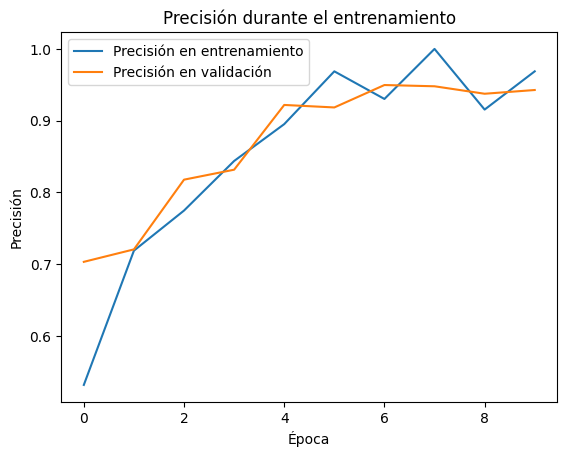

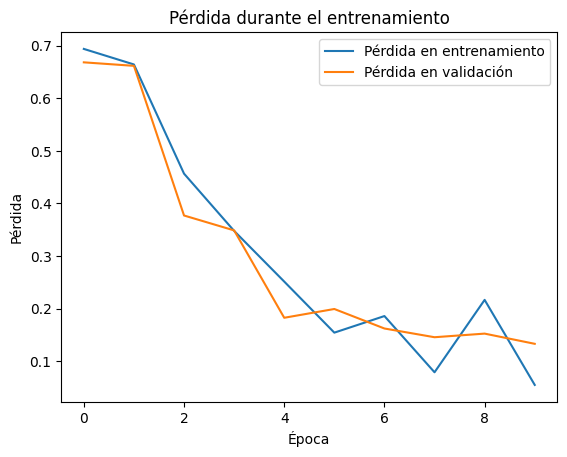

In [25]:
# Importar librerías necesarias
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# 1. Configurar rutas y parámetros
dataset_path = carpeta # Cambia esto a la ruta de tu dataset
target_size = (128, 128)  # Redimensionar a 128x128
batch_size = 32
epochs = 10

# 2. Preprocesamiento y aumento de datos
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalización de píxeles
    rotation_range=20,  # Rotación aleatoria
    width_shift_range=0.2,  # Desplazamiento horizontal aleatorio
    height_shift_range=0.2,  # Desplazamiento vertical aleatorio
    horizontal_flip=True,  # Volteo horizontal aleatorio
    validation_split=0.2  # 20% de los datos para validación
)

# 3. Cargar solo las imágenes de Tomato___healthy y Tomato___sick
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=target_size,
    color_mode='grayscale',  # Cargar en escala de grises
    batch_size=batch_size,
    class_mode='binary',  # Clasificación binaria
    classes=['Tomato___healthy', 'Tomato___Target_Spot'],  # Solo estas dos clases
    subset='training'  # Conjunto de entrenamiento
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=target_size,
    color_mode='grayscale',  # Cargar en escala de grises
    batch_size=batch_size,
    class_mode='binary',  # Clasificación binaria
    classes=['Tomato___healthy', 'Tomato___Target_Spot'],  # Solo estas dos clases
    subset='validation'  # Conjunto de validación
)

# 4. Construir el modelo
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Capa de salida para clasificación binaria
])

# 5. Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Pérdida para clasificación binaria
              metrics=['accuracy'])

# 6. Resumen del modelo
model.summary()

# 7. Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

# 8. Evaluar el modelo
loss, accuracy = model.evaluate(validation_generator)
print(f"Pérdida en validación: {loss}")
print(f"Precisión en validación: {accuracy}")

# 9. Guardar el modelo
model.save("modelo_tomate_sano_enfermo.keras")
print("Modelo guardado como 'modelo_tomate_sano_enfermo.h5'")

# 10. Visualizar el rendimiento del modelo
# Gráfico de precisión
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Gráfico de pérdida
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [ ]:
# Importar librerías necesarias
import cv2
import numpy as np
import tensorflow as tf
import pyautogui
from PIL import Image

# 1. Cargar el modelo entrenado
model = tf.keras.models.load_model("modelo_tomate_sano_enfermo.keras")

# 2. Definir el tamaño de la región de la pantalla a capturar
screen_width, screen_height = 600, 600  # Resolución de 600x600

# 3. Definir las etiquetas de las clases
class_labels = {0: "Tomate Sano", 1: "Tomate Enfermo"}

# 4. Función para preprocesar la imagen capturada
def preprocess_image(image):
    # Convertir a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Redimensionar a 128x128 (tamaño esperado por el modelo)
    resized_image = cv2.resize(gray_image, (128, 128))
    # Normalizar los valores de píxeles
    normalized_image = resized_image / 255.0
    # Expandir dimensiones para que coincida con la entrada del modelo (128, 128, 1)
    input_image = np.expand_dims(normalized_image, axis=-1)
    input_image = np.expand_dims(input_image, axis=0)  # Añadir dimensión del batch
    return input_image

# 5. Función para predecir si la planta es sana o enferma
def predict_plant(image):
    # Preprocesar la imagen
    input_image = preprocess_image(image)
    # Realizar la predicción
    prediction = model.predict(input_image)
    # Obtener la clase predicha
    predicted_class = 1 if prediction > 0.5 else 0
    # Obtener la confianza de la predicción
    confidence = prediction[0][0] if predicted_class == 1 else 1 - prediction[0][0]
    return predicted_class, confidence

# 6. Capturar la pantalla en tiempo real y realizar predicciones
print("Iniciando detección en tiempo real...")
while True:
    # Capturar la pantalla
    screenshot = pyautogui.screenshot(region=(0, 0, screen_width, screen_height))
    screenshot = np.array(screenshot)  # Convertir a un array de NumPy
    screenshot = cv2.cvtColor(screenshot, cv2.COLOR_RGB2BGR)  # Convertir a BGR (OpenCV usa BGR por defecto)

    # Realizar la predicción
    predicted_class, confidence = predict_plant(screenshot)

    # Mostrar el resultado en la pantalla
    if confidence > 0.7:  # Umbral de confianza
        label = class_labels[predicted_class]
    else:
        label = "Desconocido"

    # Mostrar el texto en la pantalla
    cv2.putText(screenshot, f"Estado: {label}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    cv2.putText(screenshot, f"Confianza: {confidence:.2f}", (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # Mostrar la imagen en una ventana
    cv2.imshow("Detección en tiempo real", screenshot)

    # Salir del bucle si se presiona la tecla 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cerrar la ventana
cv2.destroyAllWindows()

Iniciando detección en tiempo real...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━

KeyboardInterrupt: 

: 